In [2]:
import keras
import librosa
import numpy as np
import sys

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
* recording
* done recording
Speech to text:
-----------------
hey how are you


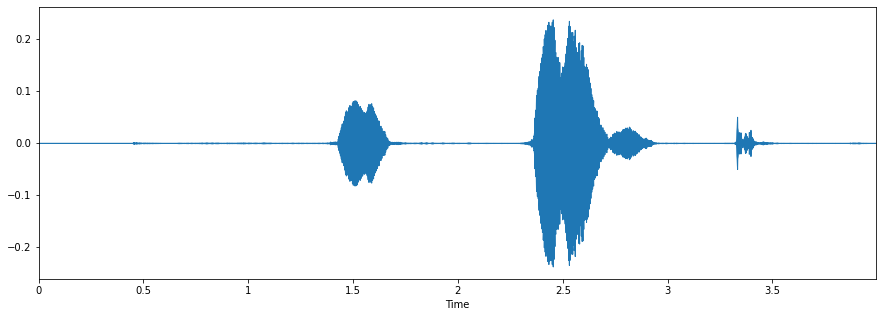

In [15]:
%pylab inline
import pyaudio
import wave
import librosa
import librosa.display
import os
import pandas as pd
import speech_recognition as sr


CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "AudioData/examples/liveaudio.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

data, sampling_rate = librosa.load('AudioData/examples/liveaudio.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

r = sr.Recognizer()
with sr.AudioFile(WAVE_OUTPUT_FILENAME) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print('Speech to text:\n' + '-'*17)
    print(text)

In [20]:
class LivePredictions:
    """
    Main class of the application.
    """

    def __init__(self, file):
        """
        Init method is used to initialize the main parameters.
        """
        self.file = file
        MODEL_DIR_PATH ='AudioData/Save_model/'
        self.path = MODEL_DIR_PATH + 'Emotion_Voice_Detection_Model.h5'
        self.loaded_model = keras.models.load_model(self.path)
    def make_predictions(self):
        """
        Method to process the files and create your features.
        """
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
        #predictions = self.loaded_model.predict_classes(x)
        predict_x=self.loaded_model.predict(x) 
        classes_x=np.argmax(predict_x,axis=1)
        print( "Prediction is", " ", self.convert_class_to_emotion(classes_x))

    @staticmethod
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label

if __name__ == '__main__':
    EXAMPLES_PATH = 'AudioData/examples/'
    live_prediction = LivePredictions(file=EXAMPLES_PATH + 'Neutral.wav')
    live_prediction.loaded_model.summary()
    live_prediction.make_predictions()
    #live_prediction = LivePredictions(file=EXAMPLES_PATH + 'Angry.wav')
    #live_prediction.make_predictions()
    #live_prediction = LivePredictions(file=EXAMPLES_PATH + '10-16-07-29-82-30-63.wav')
    #live_prediction.make_predictions()
    #live_prediction = LivePredictions(file=EXAMPLES_PATH + '03-01-05-02-02-02-01.wav')
    #live_prediction.make_predictions()
    live_prediction = LivePredictions(file=EXAMPLES_PATH + '03-01-05-02-01-01-01.wav')
    live_prediction.make_predictions()
    #live_prediction = LivePredictions(file=EXAMPLES_PATH + '03-01-08-01-02-02-01.wav')
    #live_prediction.make_predictions()
    #live_prediction = LivePredictions(file=EXAMPLES_PATH + 'i-cant-take-this.wav')
    #live_prediction.make_predictions()
    #live_prediction = LivePredictions(file=EXAMPLES_PATH + 'that-feels-really-powerful.wav')
    #live_prediction.make_predictions()
    print("Sentiment analysis for live audio:")
    live_prediction = LivePredictions(file=EXAMPLES_PATH + 'liveaudio.wav')
    live_prediction.make_predictions()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 128)           768       
                                                                 
 activation (Activation)     (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    